<a href="https://colab.research.google.com/github/lawyerle/AiTradingMachine/blob/main/%08AiTradign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 4.3 MB/s eta 0:00:00


In [3]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = fdr.DataReader('005380', '2014-09-05', '2024-09-05')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2014-09-05,222000,222000,216000,217500,528360,-0.018059
2014-09-11,213500,217000,212000,213500,1206072,-0.018391
2014-09-12,214000,220500,213500,220000,453172,0.030445
2014-09-15,219000,221000,217500,219500,248359,-0.002273
2014-09-16,221000,222000,218500,218500,240898,-0.004556


In [6]:
print(df.shape)

(2460, 6)


In [7]:
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)

  return numerator / (denominator + 1e-7)

In [8]:
dfx = df[['Open', 'High', 'Low', 'Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open', 'High', 'Low', 'Volume']]
dfx

,Open,High,Low,Volume
Date,,,,
2014-09-05,0.666380,0.660832,0.662281,0.018547
2014-09-11,0.629789,0.638950,0.644737,0.052823
2014-09-12,0.631941,0.654267,0.651316,0.014744
2014-09-15,0.653465,0.656455,0.668860,0.004385
2014-09-16,0.662075,0.660832,0.673246,0.004008
...,...,...,...,...
2024-08-30,0.834266,0.851204,0.835526,0.052867
2024-09-02,0.812742,0.809628,0.789474,0.042737
2024-09-03,0.761085,0.759300,0.750000,0.043641


In [9]:
dfx.describe()

,Open,High,Low,Volume
count,2460.000000,2460.000000,2460.000000,2460.000000
mean,0.425491,0.425630,0.433513,0.035044
std,0.171762,0.177261,0.172297,0.044921
min,0.000000,0.000000,0.000000,0.000000
25%,0.296169,0.291028,0.304825,0.014228
50%,0.399483,0.401532,0.407895,0.022720
75%,0.520017,0.519912,0.531579,0.038912
max,1.000000,1.000000,1.000000,1.000000


In [10]:
dfy.head()

,Close
Date,
2014-09-05,0.653167
2014-09-11,0.635933
2014-09-12,0.663938
2014-09-15,0.661784
2014-09-16,0.657475


In [11]:
X = dfx.values.tolist()
y = dfy.values.tolist()

In [12]:
X[:5]

[[0.6663796814461187,
  0.6608315098465379,
  0.6622807017540955,
  0.018546588451190036],
 [0.6297890658628369,
  0.6389496717721492,
  0.6447368421049804,
  0.05282285910117722],
 [0.6319414550147947,
  0.6542669584242213,
  0.6513157894733985,
  0.014743845932788064],
 [0.6534653465343722,
  0.6564551422316602,
  0.6688596491225136,
  0.004385130400768821],
 [0.6620749031422032,
  0.6608315098465379,
  0.6732456140347924,
  0.004007779468042892]]

In [13]:
y[:5]

[[0.6531667384745139],
 [0.6359327875912814],
 [0.6639379577765343],
 [0.6617837139161302],
 [0.6574752261953221]]

In [14]:
window_size = 10

data_X = []
data_y = []

for i in range(len(y) - window_size) :
  _X = X[i : i + window_size]
  _y = y[i + window_size]
  data_X.append(_X)
  data_y.append(_y)
print(_X, "-->", _y)

[[0.8019801980194567, 0.8008752735226254, 0.7916666666663195, 0.01697315492792189], [0.7675419715881328, 0.8008752735226254, 0.78947368421018, 0.014542399911470898], [0.8105897546272878, 0.8183807439821363, 0.800438596490877, 0.015571580199641374], [0.7804563064998793, 0.7877461706779922, 0.7872807017540406, 0.01989485559562212], [0.7847610848037948, 0.8315098468267695, 0.7938596491224589, 0.05104752436849453], [0.8364184244507807, 0.8577680525160359, 0.8377192982452466, 0.07510719932575478], [0.8342660352988229, 0.8512035010937193, 0.8355263157891072, 0.05286675946434652], [0.8127421437792455, 0.809628008752381, 0.78947368421018, 0.04273730700403973], [0.7610848041322595, 0.7592997811812869, 0.749999999999671, 0.043640653071512964], [0.7051226861813581, 0.724288840262265, 0.721491228069859, 0.039480031555661765]] --> [0.7027143472638075]


In [15]:
print('전체 데이터의 크기 : ', len(data_X), len(data_y))

전체 데이터의 크기 :  2450 2450


In [58]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print(type(train_X))

<class 'numpy.ndarray'>


In [66]:
# 학습 데이터와 테스트 데이터의 분리(train_test_split를 이용하여 분리)
# 에러발생 list 와 ndarray의 차이는?

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_X, data_y,
                                                    shuffle=False,  #시계열데이터이라 shuffle되면 안됨
                                                    test_size = 0.28)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

print(type(train_X))

print(train_X[0])

<class 'numpy.ndarray'>
[[0.66637968 0.66083151 0.6622807  0.01854659]
 [0.62978907 0.63894967 0.64473684 0.05282286]
 [0.63194146 0.65426696 0.65131579 0.01474385]
 [0.65346535 0.65645514 0.66885965 0.00438513]
 [0.6620749  0.66083151 0.67324561 0.00400778]
 [0.64700818 0.64770241 0.6622807  0.01088592]
 [0.63409384 0.6345733  0.5745614  0.15150779]
 [0.55445545 0.57330416 0.56798246 0.10527788]
 [0.563065   0.56017505 0.56798246 0.03347767]
 [0.54154111 0.53829322 0.54605263 0.05033065]]


In [52]:
print('훈련 데이터의 크기 : ', len(train_X), len(train_y))
print('테스트 데이터의 크기 : ', len(test_X), len(test_y))
print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 :  1715 1715
테스트 데이터의 크기 :  735 735
훈련 데이터의 크기 : (1715, 10, 4) (1715, 1)
테스트 데이터의 크기 : (735, 10, 4) (735, 1)


In [32]:
!pip install tensorflow

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input

In [67]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10,4)))
model.add(Dropout(0.2))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 10, 20)              │           2,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 20)                  │           3,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)
loss = model.evaluate(test_X, test_y)
print('loss : ', loss)

Epoch 1/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1097
Epoch 2/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0061
Epoch 3/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0051
Epoch 4/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050
Epoch 5/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0042
Epoch 6/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0042
Epoch 7/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0040
Epoch 8/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037
Epoch 9/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 10/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0035
Epoch 11/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032
Epoch 12/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0028
Epoch 13/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0030
Epoch 14/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0032
Epoch 15/70
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028
Epoch 16/7

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


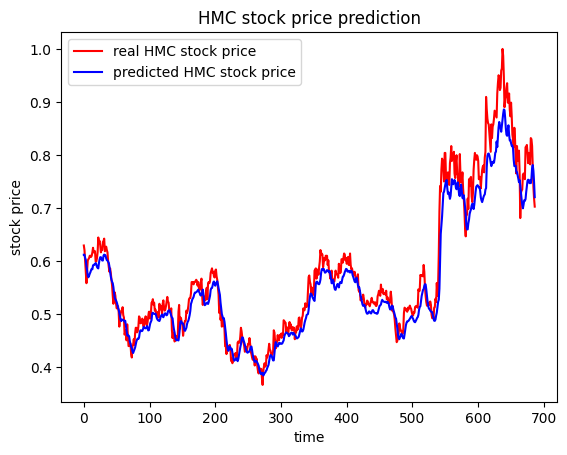

내일 현대자동차 주가 : [234818.25129967] KRW
내일 주가 차이 :  [5818.25129967]


<ipython-input-71-2acb62b746d9>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predict_value = df.Close[-1] * pred_y[-1] / dfy.Close[-1]
<ipython-input-71-2acb62b746d9>:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("내일 주가 차이 : ", predict_value - df.Close[-1])


In [71]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real HMC stock price')
plt.plot(pred_y, color='blue', label='predicted HMC stock price')
plt.title('HMC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

predict_value = df.Close[-1] * pred_y[-1] / dfy.Close[-1]
print("내일 현대자동차 주가 :", predict_value, 'KRW')
print("내일 주가 차이 : ", predict_value - df.Close[-1])